# Preprocessing Part

This part is available in ConvNet.ipynb

# Training Part - 

1) Using SVM with PCA
2) Using SVM without PCA
3) Using KNN

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Loading Image data
import numpy as np
data1 = np.load("truncated_X_full.npy")
data1.shape

(17205L, 30000L)

In [3]:
#Loading label data
data1 = np.reshape(data1, (17205,30000))
datay = np.load("truncated_Y_full.npy")
print(datay.shape)
print(data1.shape)
# Assigning some garbage labels with a random label
for i in range(datay.shape[0]):
    if(datay[i] == '20170109142408075.jpg.chip'):
        datay[i] = '2'
    if(datay[i] == '20170109150557335.jpg.chip'):
        datay[i] = '2'
        
X_data = data1/255.0
Y = datay


(17205L,)
(17205L, 30000L)


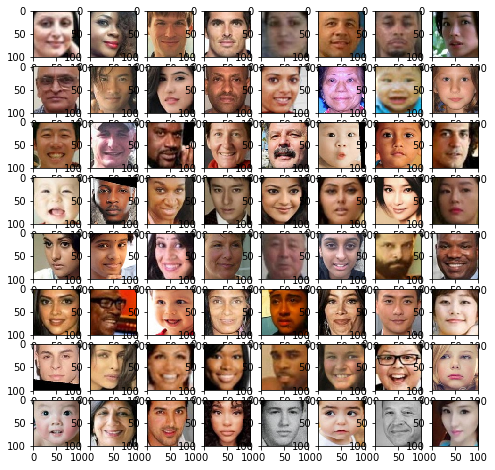

In [4]:
# Sample Images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(np.reshape(X_data[i],(100,100,3)), cmap = plt.cm.bone)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [ ]:
pca = PCA()
pca.fit_transform(X_train)

In [9]:
pca.explained_variance_.shape

(8313,)

In [5]:
X_train.shape

(8313L, 30000L)

In [11]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

1132

In [12]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [13]:
#Applying RBF kernel SVM 

svc = svm.SVC()
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score


0.6857532379004772

In [15]:
y_pred_svm.shape

(1467,)

In [18]:
x_test_pca.shape

(1467, 1132)

In [21]:
test_pred = svc.predict(X_test_pca)
test_pred.shape

NameError: name 'X_test_pca' is not defined

In [22]:
# SVM without PCA
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred_svm = svc.predict(X_test)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score


0.6025903203817314

In [6]:
# KNN
# Note: Prediction may take more time than training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn)
knn_score